In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime

In [350]:
listings = pd.read_excel("Dataset_1_Listings.csv.xlsx")
listings.head()

,Listing_Id,Posting_Date,Posting_Time,Location,Images,Bookings,Host_Type
0,4955430,13/05/2019,20:18:13,San Francisco,31,10,Regular
1,3338094,2016-04-01 00:00:00,05:30:37,Amsterdam,6,48,Regular
2,3132720,24/12/2018,12:26:15,Barcelona,25,10,Regular
3,3196344,14/10/2014,15:09:27,Berlin,10,134,Superhost
4,4588846,21/07/2016,09:26:48,Brussels,4,7,Regular


In [351]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Listing_Id    500 non-null    int64 
 1   Posting_Date  500 non-null    object
 2   Posting_Time  500 non-null    object
 3   Location      500 non-null    object
 4   Images        500 non-null    int64 
 5   Bookings      500 non-null    int64 
 6   Host_Type     500 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.5+ KB


#### Calculating Posting Age (No of years from posting date )

In [352]:
listings['Posting_Age'] = listings['Posting_Date'].apply(lambda x: pd.to_datetime(x) - pd.Timestamp('2019-08-31'))
listings['Posting_Age']

0      -110 days
1     -1247 days
2      -250 days
3     -1782 days
4     -1136 days
         ...    
495    -798 days
496   -1173 days
497    -765 days
498   -1477 days
499    -251 days
Name: Posting_Age, Length: 500, dtype: timedelta64[ns]

In [353]:
listings['Posting_Age'] = round(abs(listings['Posting_Age'].dt.days)/365, 2)
listings['Posting_Age']

0      0.30
1      3.42
2      0.68
3      4.88
4      3.11
       ... 
495    2.19
496    3.21
497    2.10
498    4.05
499    0.69
Name: Posting_Age, Length: 500, dtype: float64

In [354]:
listings.describe()

,Listing_Id,Images,Bookings,Posting_Age
count,5.000000e+02,500.000000,500.000000,500.00000
mean,4.494960e+06,14.432000,45.572000,2.38110
std,8.498921e+05,9.379837,54.536642,1.48045
min,3.007157e+06,0.000000,0.000000,0.01000
25%,3.703973e+06,6.000000,8.000000,1.09000
50%,4.580048e+06,14.000000,31.000000,2.31000
75%,5.199979e+06,23.000000,59.500000,3.58500
max,5.997748e+06,32.000000,325.000000,5.64000


#### Checking No of Bookings against Property Age

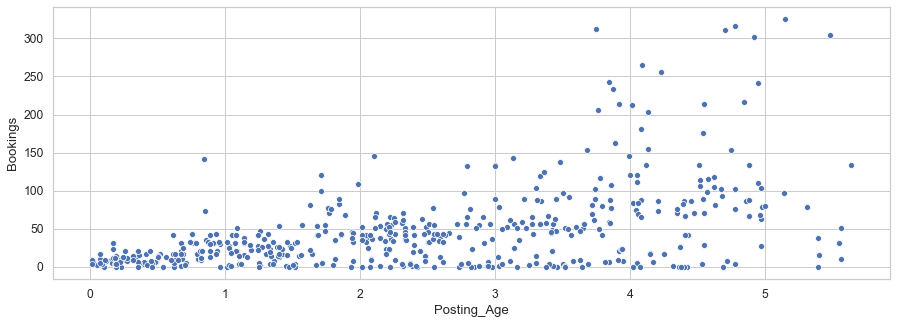

In [355]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})

sns.scatterplot( x='Posting_Age', y='Bookings', data=listings)

In [356]:
listings.groupby(listings['Posting_Age'].astype('int'))['Bookings'].sum()

Posting_Age
0    1634
1    2870
2    3812
3    6020
4    7289
5    1161
Name: Bookings, dtype: int64

#### Observation: 
* No of bookings increases with old postings, this could be because host may work on reviews and recoomendations of guests and improve their listing amenities etc.
* Sudden fall in bookings for posting older than 4 years, probably guests wont like too old properties

In [357]:
listings.groupby('Host_Type')['Bookings'].sum()

Host_Type
Regular      14642
Superhost     8144
Name: Bookings, dtype: int64

#### relative percentage of booking by host/superhost

In [358]:
listings['Host_Type'].value_counts()

Regular      446
Superhost     54
Name: Host_Type, dtype: int64

In [359]:
listings.groupby('Host_Type')['Bookings'].sum()

Host_Type
Regular      14642
Superhost     8144
Name: Bookings, dtype: int64

In [360]:
print("Regular Hosts Booking % ", str(round(14592/439,2)))
print("Regular Hosts SuperHost % ", str(round(8144/54,2)))

Regular Hosts Booking %  33.24
Regular Hosts SuperHost %  150.81


#### creating images bins as per data provided in dataset 2

In [361]:
listings['Images_Bin'] = listings['Images'].apply(lambda x: '0-2' if x in [0,1,2] else ('3-5' if x in [3,4,5] else ('6-10' if x in [6,7,8,9,10] else ('11-15' if x in [11,12,13,14,15] else '16'))))
listings

,Listing_Id,Posting_Date,Posting_Time,Location,Images,Bookings,Host_Type,Posting_Age,Images_Bin
0,4955430,13/05/2019,20:18:13,San Francisco,31,10,Regular,0.30,16
1,3338094,2016-04-01 00:00:00,05:30:37,Amsterdam,6,48,Regular,3.42,6-10
2,3132720,24/12/2018,12:26:15,Barcelona,25,10,Regular,0.68,16
3,3196344,14/10/2014,15:09:27,Berlin,10,134,Superhost,4.88,6-10
4,4588846,21/07/2016,09:26:48,Brussels,4,7,Regular,3.11,3-5
...,...,...,...,...,...,...,...,...,...
495,4103851,24/06/2017,20:30:56,San Jose,6,17,Regular,2.19,6-10
496,5590537,14/06/2016,18:46:44,London,16,89,Superhost,3.21,16
497,5074972,27/07/2017,08:36:09,Kyoto,15,145,Superhost,2.10,11-15
498,5230720,15/08/2015,20:58:58,Los Angeles,21,121,Regular,4.05,16


#### Bookings_Per_Year: No of avg booking made per year (Bookings/Posting_Age)

In [362]:
listings['Bookings_Per_Year'] = round(listings['Bookings']/listings['Posting_Age'],2)
listings

,Listing_Id,Posting_Date,Posting_Time,Location,Images,Bookings,Host_Type,Posting_Age,Images_Bin,Bookings_Per_Year
0,4955430,13/05/2019,20:18:13,San Francisco,31,10,Regular,0.30,16,33.33
1,3338094,2016-04-01 00:00:00,05:30:37,Amsterdam,6,48,Regular,3.42,6-10,14.04
2,3132720,24/12/2018,12:26:15,Barcelona,25,10,Regular,0.68,16,14.71
3,3196344,14/10/2014,15:09:27,Berlin,10,134,Superhost,4.88,6-10,27.46
4,4588846,21/07/2016,09:26:48,Brussels,4,7,Regular,3.11,3-5,2.25
...,...,...,...,...,...,...,...,...,...,...
495,4103851,24/06/2017,20:30:56,San Jose,6,17,Regular,2.19,6-10,7.76
496,5590537,14/06/2016,18:46:44,London,16,89,Superhost,3.21,16,27.73
497,5074972,27/07/2017,08:36:09,Kyoto,15,145,Superhost,2.10,11-15,69.05
498,5230720,15/08/2015,20:58:58,Los Angeles,21,121,Regular,4.05,16,29.88


In [280]:
listings.describe()

,Listing_Id,Images,Bookings,Posting_Age,Bookings_Per_Year
count,5.000000e+02,500.000000,500.000000,500.00000,500.000000
mean,4.494960e+06,14.432000,45.572000,2.38110,28.167440
std,8.498921e+05,9.379837,54.536642,1.48045,63.748118
min,3.007157e+06,0.000000,0.000000,0.01000,0.000000
25%,3.703973e+06,6.000000,8.000000,1.09000,9.135000
50%,4.580048e+06,14.000000,31.000000,2.31000,18.040000
75%,5.199979e+06,23.000000,59.500000,3.58500,29.047500
max,5.997748e+06,32.000000,325.000000,5.64000,900.000000


#### ditribution plot for Bookings per year

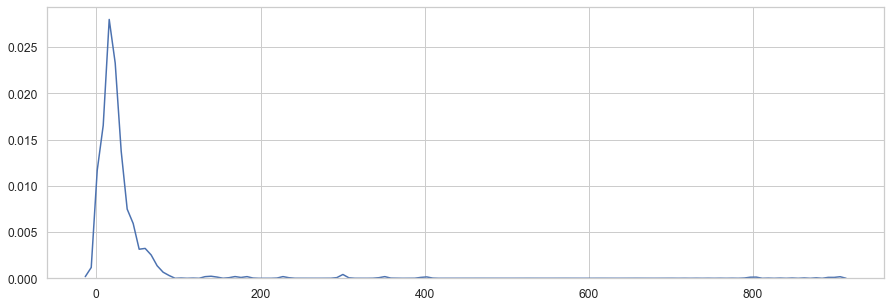

In [282]:
sns.distplot(listings[['Bookings_Per_Year']], bins=[50])

In [283]:
# Outliers
listings[listings['Bookings_Per_Year']>200]

,Listing_Id,Posting_Date,Posting_Time,Location,Images,Bookings,Host_Type,Posting_Age,Images_Bin,Bookings_Per_Year
140,5521756,26/08/2019,00:20:28,New Jersey,9,3,Regular,0.01,6-10,300.00
261,3248655,26/08/2019,19:15:19,Mumbai,10,3,Regular,0.01,6-10,300.00
292,5185253,26/08/2019,07:25:08,Mumbai,11,9,Regular,0.01,11-15,900.00
314,5716022,2019-09-06 00:00:00,07:30:15,Kyoto,12,7,Regular,0.02,11-15,350.00
377,4109872,27/08/2019,03:36:52,Chicago,32,8,Regular,0.01,16,800.00
393,4480372,2019-08-05 00:00:00,05:57:39,Seattle,19,16,Regular,0.07,16,228.57
449,5816800,26/08/2019,21:38:08,New Jersey,4,4,Regular,0.01,3-5,400.00


##### Removing rows where bookings per year > 200, these rows can be treated as outliers

In [284]:
listings = listings[(listings['Bookings_Per_Year']<=200)].copy()
listings

,Listing_Id,Posting_Date,Posting_Time,Location,Images,Bookings,Host_Type,Posting_Age,Images_Bin,Bookings_Per_Year
0,4955430,13/05/2019,20:18:13,San Francisco,31,10,Regular,0.30,16,33.33
1,3338094,2016-04-01 00:00:00,05:30:37,Amsterdam,6,48,Regular,3.42,6-10,14.04
2,3132720,24/12/2018,12:26:15,Barcelona,25,10,Regular,0.68,16,14.71
3,3196344,14/10/2014,15:09:27,Berlin,10,134,Superhost,4.88,6-10,27.46
4,4588846,21/07/2016,09:26:48,Brussels,4,7,Regular,3.11,3-5,2.25
...,...,...,...,...,...,...,...,...,...,...
495,4103851,24/06/2017,20:30:56,San Jose,6,17,Regular,2.19,6-10,7.76
496,5590537,14/06/2016,18:46:44,London,16,89,Superhost,3.21,16,27.73
497,5074972,27/07/2017,08:36:09,Kyoto,15,145,Superhost,2.10,11-15,69.05
498,5230720,15/08/2015,20:58:58,Los Angeles,21,121,Regular,4.05,16,29.88


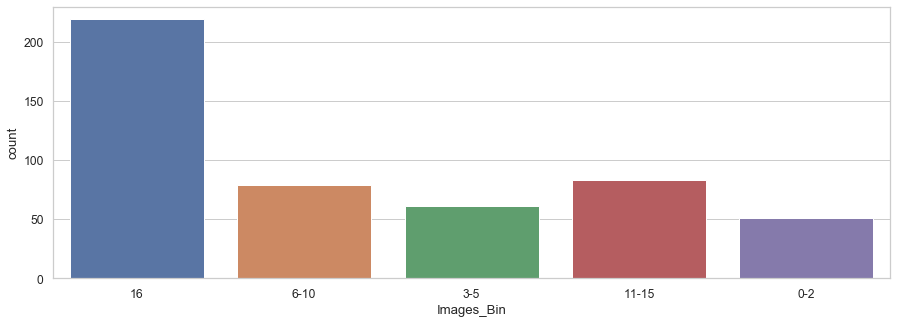

In [285]:
sns.countplot(listings['Images_Bin'])

In [286]:
listings.groupby('Images_Bin')['Bookings'].sum()

Images_Bin
0-2         22
11-15     5429
16       13409
3-5        612
6-10      3264
Name: Bookings, dtype: int64

##### Plotting Images Buckets based on no of bookings per year based on different locations

San Francisco


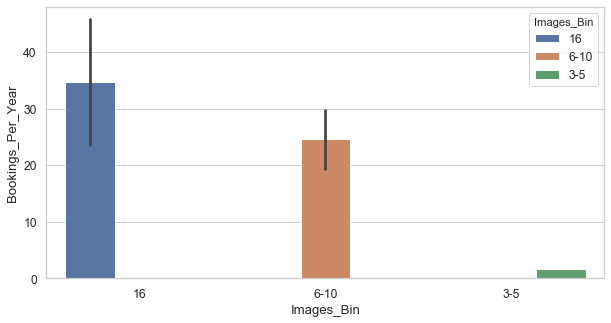

Amsterdam


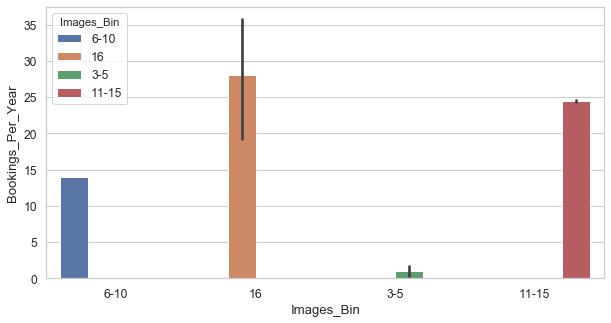

Barcelona


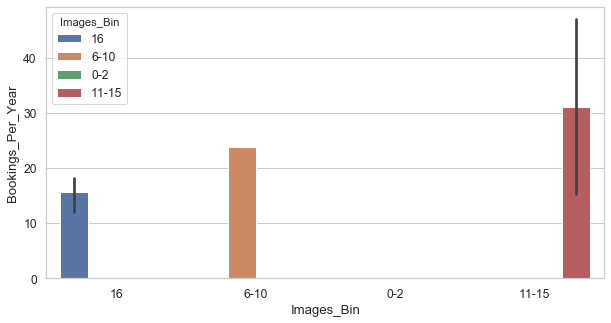

Berlin


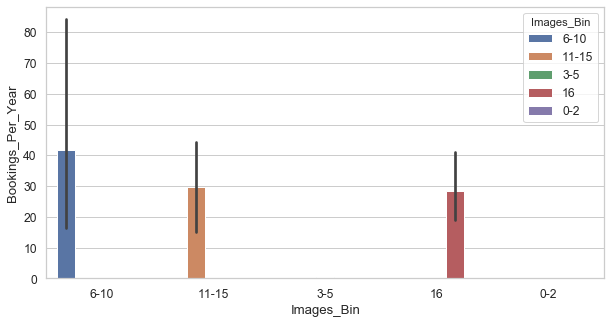

Brussels


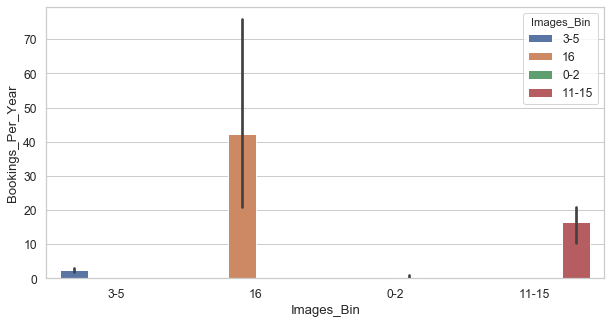

Kyoto


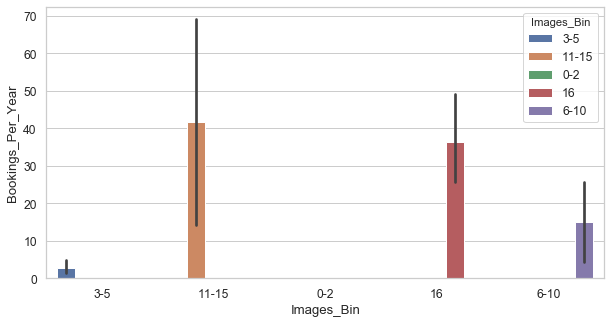

Madrid


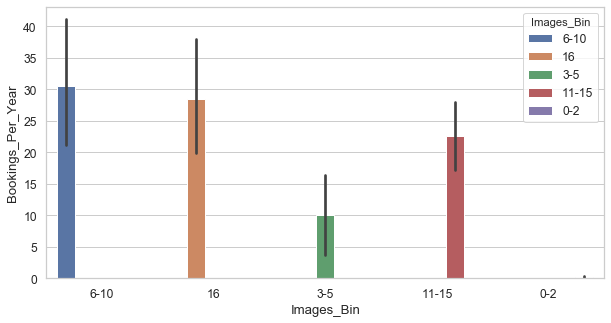

Tokyo


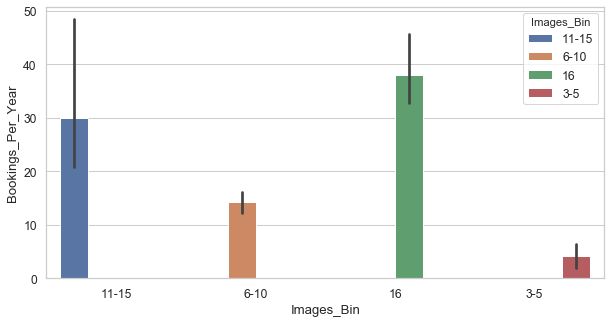

Los Angeles


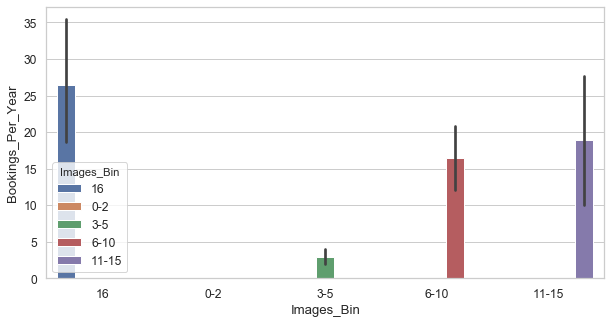

Seattle


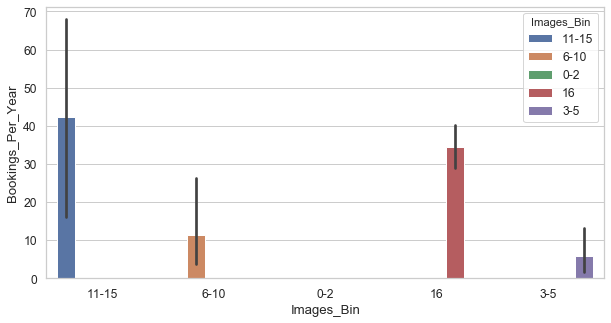

Mexico City


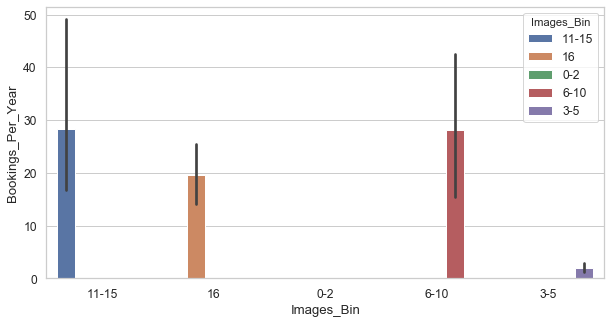

Milano


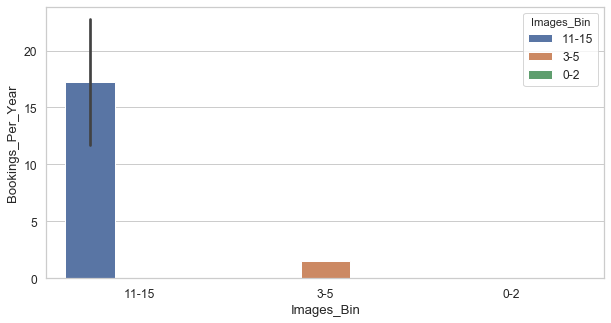

Paris


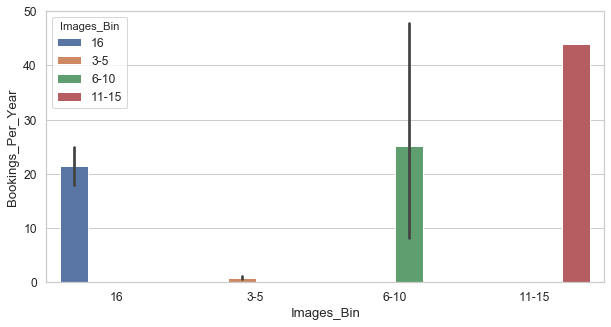

Osaka


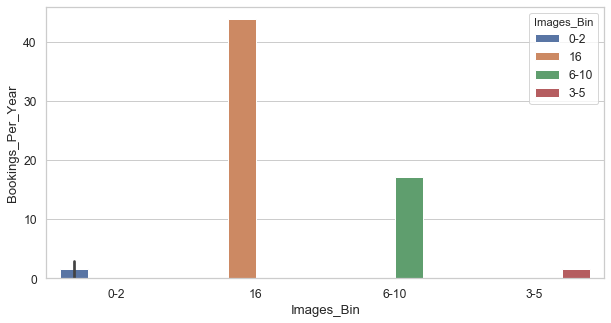

Rio


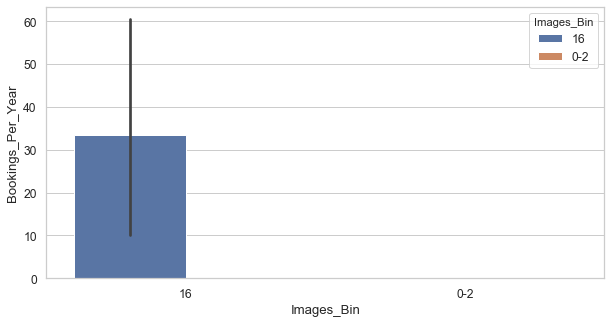

Seoul


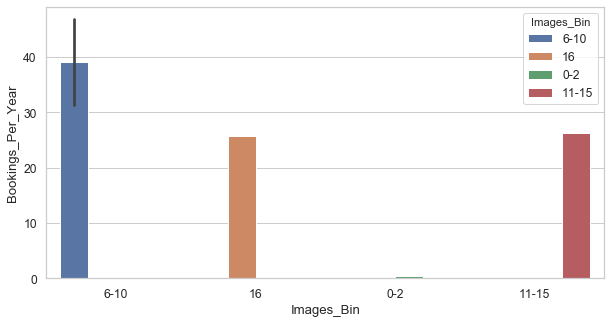

Sao Paulo


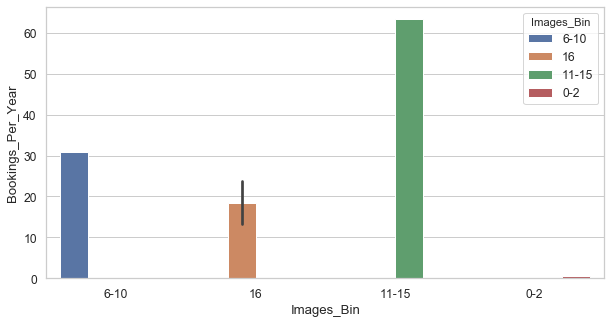

Roma


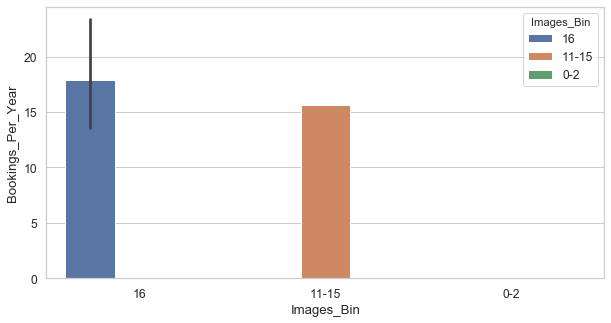

Bengaluru


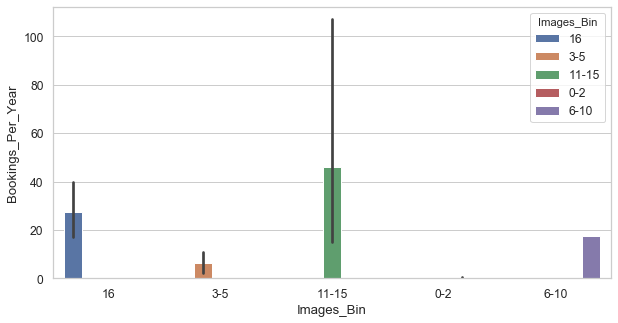

New Delhi


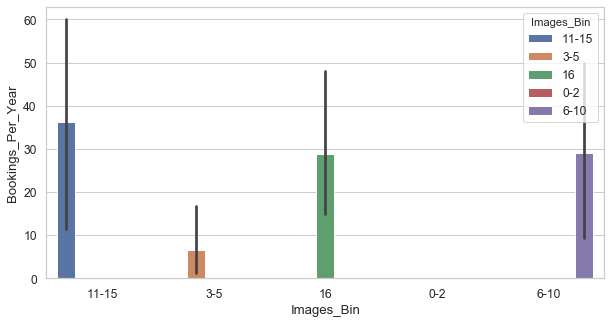

Chennai


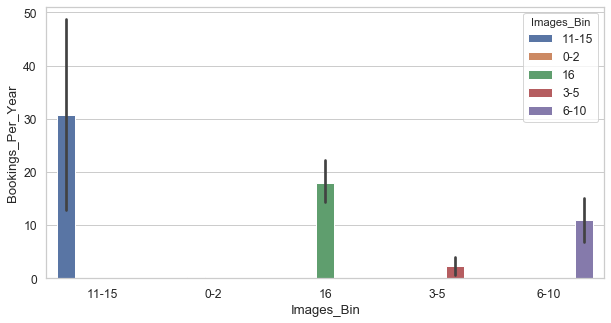

San Jose


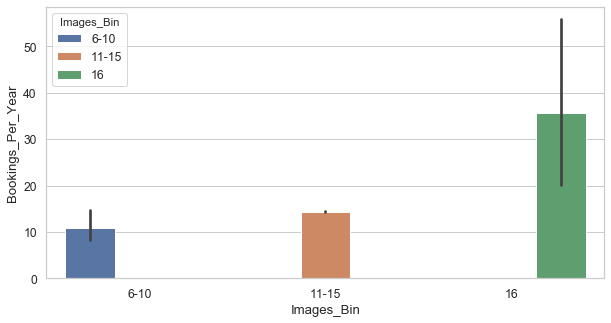

Berkeley


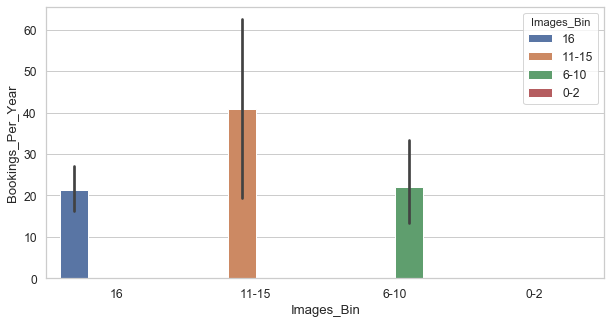

Miami


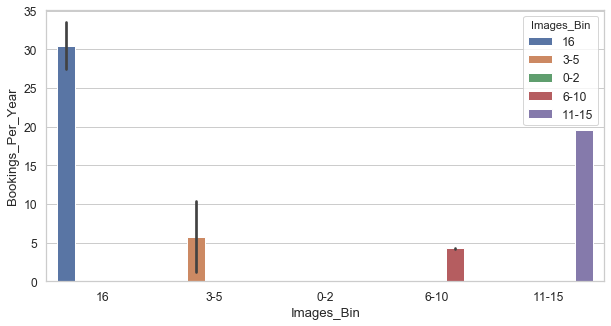

New York


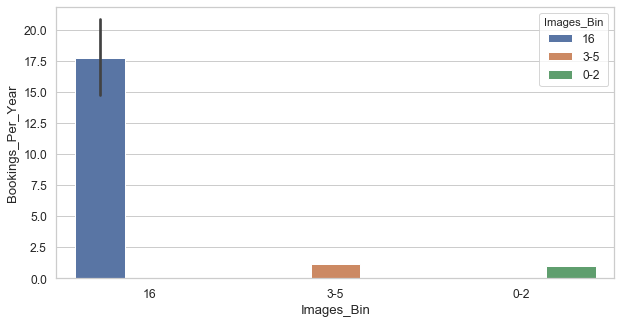

New Jersey


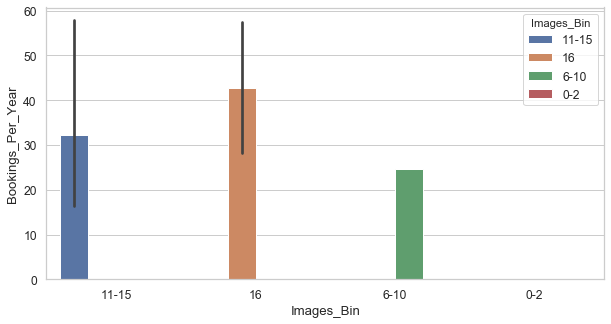

Boston


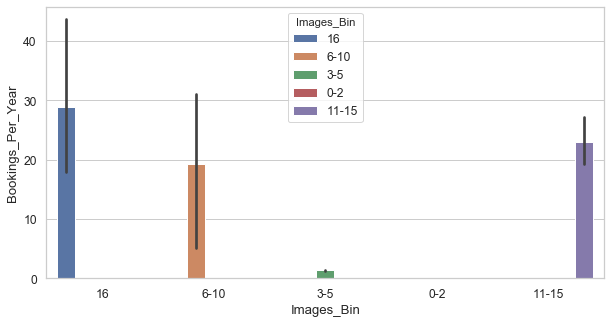

Sydney


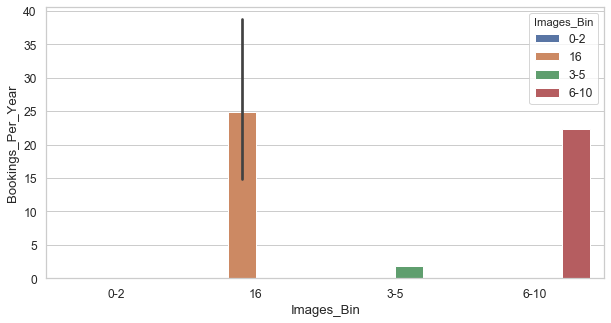

London


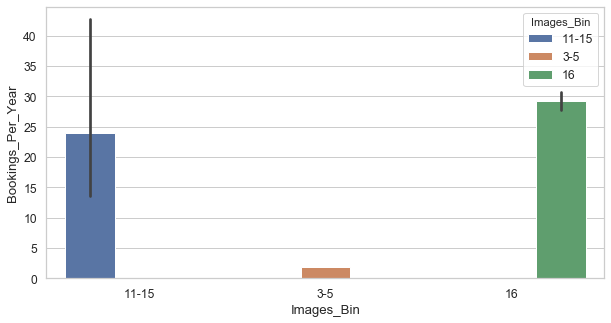

San Diego


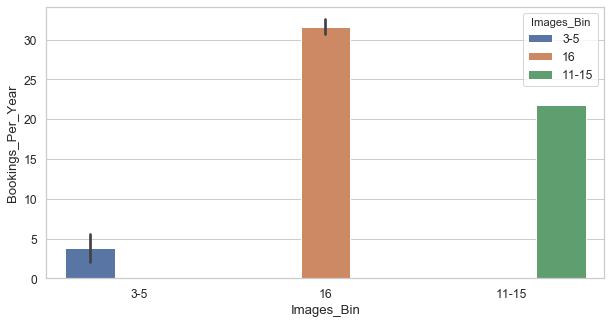

Vancouver


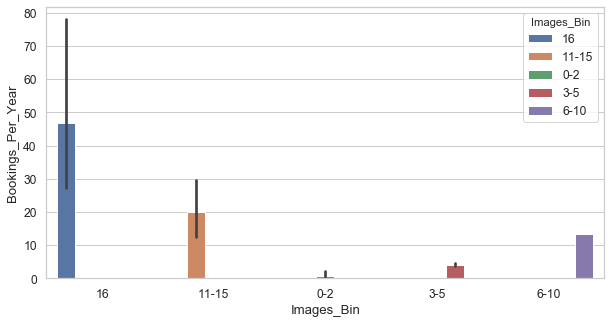

Mumbai


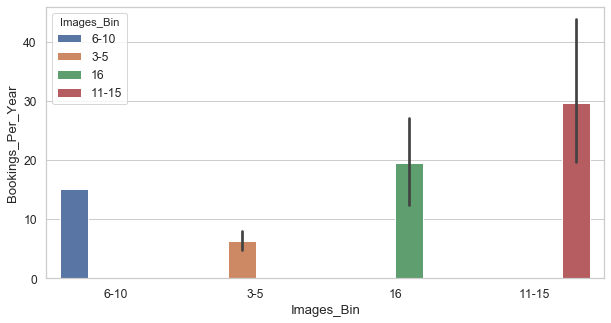

Toronto


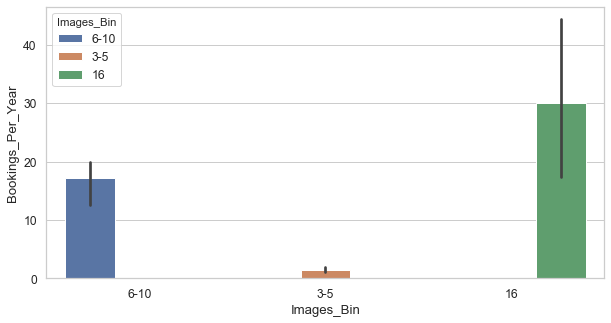

Tunis


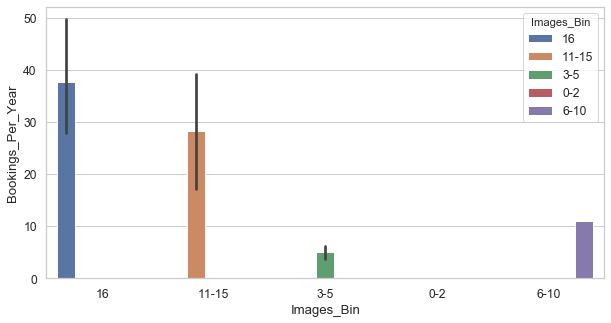

Wellington


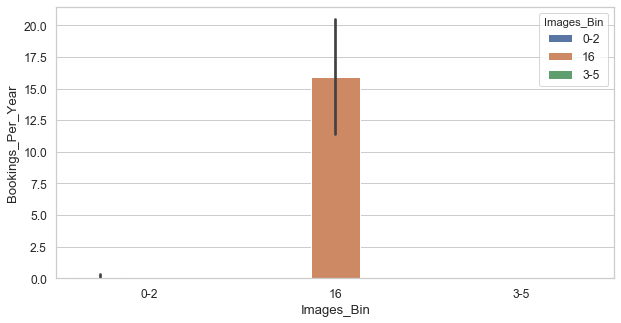

Auckland


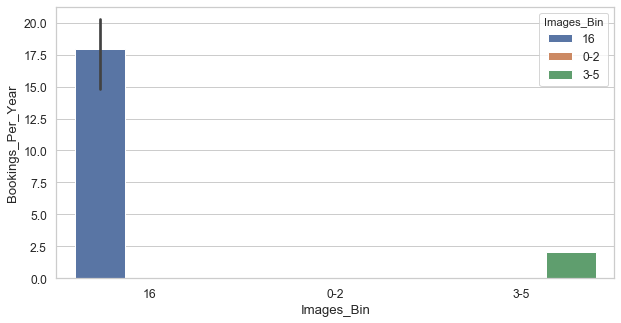

Shanghai


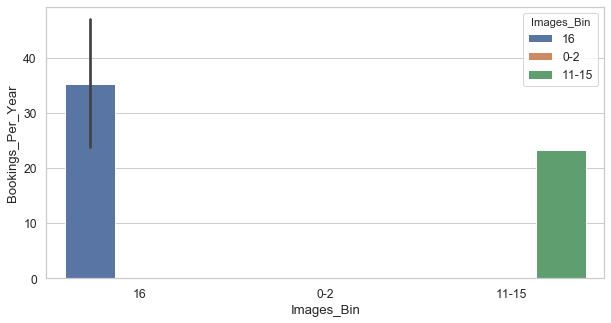

Cape Town


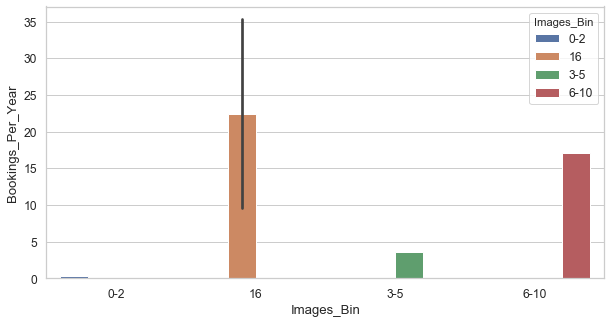

Chicago


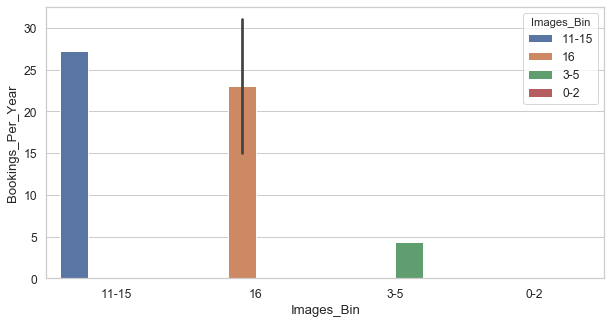

Cambridge


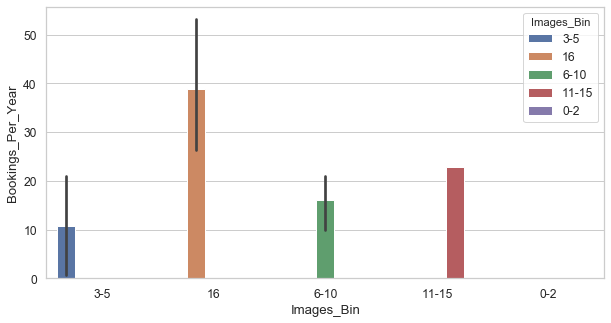

In [288]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 5]})

for location in listings['Location'].unique():
    print(location)
    sns.barplot(x='Images_Bin', y='Bookings_Per_Year', data=listings[listings['Location']==location], hue='Images_Bin')
    plt.legend = True
    plt.show()

##### Finding correlation between numerical features

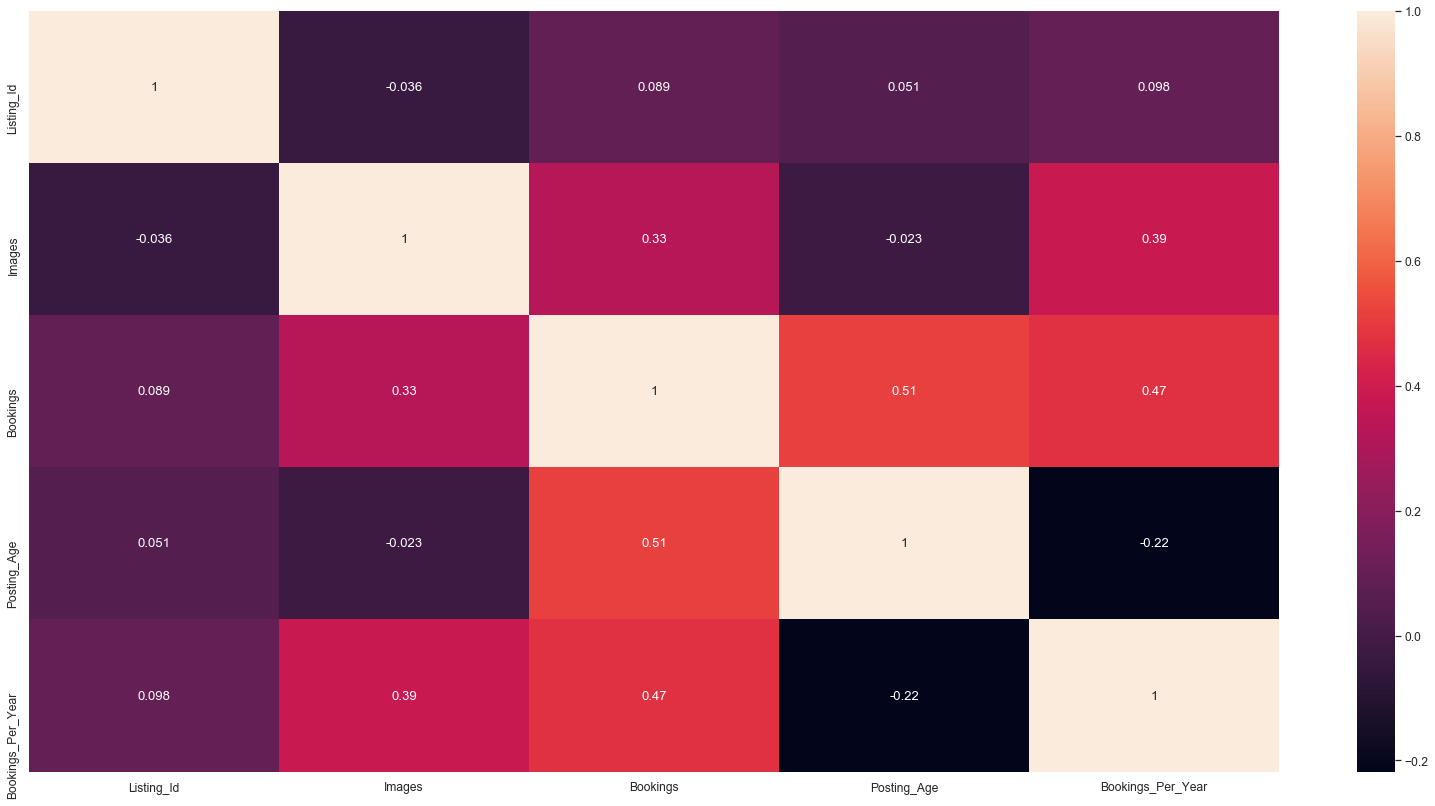

In [294]:
fig, ax = plt.subplots(figsize=(28,14))
sns.heatmap(listings.corr(), annot=True, ax=ax)

High correlation exists between Bookings per year and Booking, will not consider Bookings parameter for model building

#### To find optimal no of  images for existing listings, we will create a regression model. First, we need to create a training data which represents high success rate for listings.
#### We defined any listing as sucessful as follow:
*	Minimum Bookings per year > 8 (25 percentile of Booking per year)
*	Listings which falls in ideal images bucket only, that is, 6-10, 11-15 or 16+


In [301]:
training_data = listings[['Listing_Id', 'Location', 'Host_Type', 'Posting_Age', 'Bookings_Per_Year','Images_Bin','Images']]
training_data

,Listing_Id,Location,Host_Type,Posting_Age,Bookings_Per_Year,Images_Bin,Images
0,4955430,San Francisco,Regular,0.30,33.33,16,31
1,3338094,Amsterdam,Regular,3.42,14.04,6-10,6
2,3132720,Barcelona,Regular,0.68,14.71,16,25
3,3196344,Berlin,Superhost,4.88,27.46,6-10,10
4,4588846,Brussels,Regular,3.11,2.25,3-5,4
...,...,...,...,...,...,...,...
495,4103851,San Jose,Regular,2.19,7.76,6-10,6
496,5590537,London,Superhost,3.21,27.73,16,16
497,5074972,Kyoto,Superhost,2.10,69.05,11-15,15
498,5230720,Los Angeles,Regular,4.05,29.88,16,21


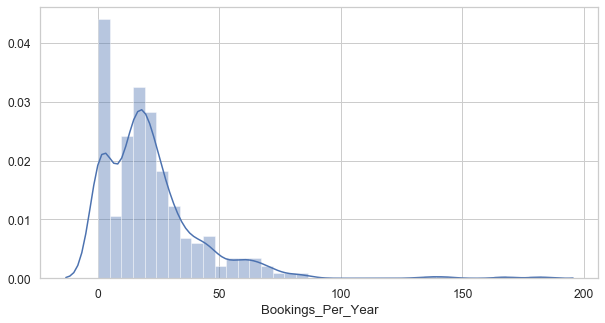

In [302]:
sns.distplot(training_data['Bookings_Per_Year'])

In [303]:
listings['Bookings_Per_Year'].describe()

count    493.000000
mean      21.917140
std       21.289122
min        0.000000
25%        8.610000
50%       17.830000
75%       28.000000
max      182.350000
Name: Bookings_Per_Year, dtype: float64

mean bookings_per_year = 21

In [306]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Listing_Id         493 non-null    int64  
 1   Location           493 non-null    object 
 2   Host_Type          493 non-null    object 
 3   Posting_Age        493 non-null    float64
 4   Bookings_Per_Year  493 non-null    float64
 5   Images_Bin         493 non-null    object 
 6   Images             493 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 47.0+ KB


In [309]:
training_data = training_data[(training_data['Bookings_Per_Year']>8) & (training_data['Images_Bin'].isin(['16','11-15','6-10']))].reset_index(drop=True).copy()
training_data

,Listing_Id,Location,Host_Type,Posting_Age,Bookings_Per_Year,Images_Bin,Images
0,4955430,San Francisco,Regular,0.30,33.33,16,31
1,3338094,Amsterdam,Regular,3.42,14.04,6-10,6
2,3132720,Barcelona,Regular,0.68,14.71,16,25
3,3196344,Berlin,Superhost,4.88,27.46,6-10,10
4,3485608,Madrid,Regular,3.41,12.90,6-10,7
...,...,...,...,...,...,...,...
361,3526794,Berkeley,Regular,1.40,18.57,16,21
362,5590537,London,Superhost,3.21,27.73,16,16
363,5074972,Kyoto,Superhost,2.10,69.05,11-15,15
364,5230720,Los Angeles,Regular,4.05,29.88,16,21


In [310]:
training_data['Images_Bin'].value_counts()

16       216
11-15     83
6-10      67
Name: Images_Bin, dtype: int64

In [311]:
training_data['Host_Type'].value_counts()

Regular      312
Superhost     54
Name: Host_Type, dtype: int64

In [312]:
training_data

,Listing_Id,Location,Host_Type,Posting_Age,Bookings_Per_Year,Images_Bin,Images
0,4955430,San Francisco,Regular,0.30,33.33,16,31
1,3338094,Amsterdam,Regular,3.42,14.04,6-10,6
2,3132720,Barcelona,Regular,0.68,14.71,16,25
3,3196344,Berlin,Superhost,4.88,27.46,6-10,10
4,3485608,Madrid,Regular,3.41,12.90,6-10,7
...,...,...,...,...,...,...,...
361,3526794,Berkeley,Regular,1.40,18.57,16,21
362,5590537,London,Superhost,3.21,27.73,16,16
363,5074972,Kyoto,Superhost,2.10,69.05,11-15,15
364,5230720,Los Angeles,Regular,4.05,29.88,16,21


In [313]:
training_data['Ideal_Images_Per_Location'] = training_data[['Location', 'Images', 'Host_Type']].apply(lambda x: 1 if x[1] in geo_maps[x[0]] else (1 if x[2] == 'Superhost' else 0) , axis=1)
training_data

,Listing_Id,Location,Host_Type,Posting_Age,Bookings_Per_Year,Images_Bin,Images,Ideal_Images_Per_Location
0,4955430,San Francisco,Regular,0.30,33.33,16,31,1
1,3338094,Amsterdam,Regular,3.42,14.04,6-10,6,0
2,3132720,Barcelona,Regular,0.68,14.71,16,25,0
3,3196344,Berlin,Superhost,4.88,27.46,6-10,10,1
4,3485608,Madrid,Regular,3.41,12.90,6-10,7,1
...,...,...,...,...,...,...,...,...
361,3526794,Berkeley,Regular,1.40,18.57,16,21,0
362,5590537,London,Superhost,3.21,27.73,16,16,1
363,5074972,Kyoto,Superhost,2.10,69.05,11-15,15,1
364,5230720,Los Angeles,Regular,4.05,29.88,16,21,1


In [314]:
training_data = training_data[training_data['Ideal_Images_Per_Location']==1].copy()
training_data

,Listing_Id,Location,Host_Type,Posting_Age,Bookings_Per_Year,Images_Bin,Images,Ideal_Images_Per_Location
0,4955430,San Francisco,Regular,0.30,33.33,16,31,1
3,3196344,Berlin,Superhost,4.88,27.46,6-10,10,1
4,3485608,Madrid,Regular,3.41,12.90,6-10,7,1
6,4761153,Los Angeles,Superhost,1.63,49.69,16,28,1
7,4991055,Seattle,Regular,1.98,55.05,11-15,14,1
...,...,...,...,...,...,...,...,...
359,3951182,New Jersey,Regular,0.93,17.20,16,17,1
362,5590537,London,Superhost,3.21,27.73,16,16,1
363,5074972,Kyoto,Superhost,2.10,69.05,11-15,15,1
364,5230720,Los Angeles,Regular,4.05,29.88,16,21,1


In [315]:
training_data.reset_index(inplace=True, drop=True)
training_data

,Listing_Id,Location,Host_Type,Posting_Age,Bookings_Per_Year,Images_Bin,Images,Ideal_Images_Per_Location
0,4955430,San Francisco,Regular,0.30,33.33,16,31,1
1,3196344,Berlin,Superhost,4.88,27.46,6-10,10,1
2,3485608,Madrid,Regular,3.41,12.90,6-10,7,1
3,4761153,Los Angeles,Superhost,1.63,49.69,16,28,1
4,4991055,Seattle,Regular,1.98,55.05,11-15,14,1
...,...,...,...,...,...,...,...,...
190,3951182,New Jersey,Regular,0.93,17.20,16,17,1
191,5590537,London,Superhost,3.21,27.73,16,16,1
192,5074972,Kyoto,Superhost,2.10,69.05,11-15,15,1
193,5230720,Los Angeles,Regular,4.05,29.88,16,21,1


##### Cross verified above Success Measure on the basis of Superhost, all the existing superhost falls under training  data, which ensures that we are not missing on any significant data.

In [316]:
listings['Host_Type'].value_counts()

Regular      439
Superhost     54
Name: Host_Type, dtype: int64

In [317]:
training_data['Host_Type'].value_counts()

Regular      141
Superhost     54
Name: Host_Type, dtype: int64

In [318]:
training_data['Images_Bin'].value_counts()

16       134
11-15     42
6-10      19
Name: Images_Bin, dtype: int64

In [319]:
#  dropping 'Listing_Id', 'Ideal_Images_Per_Location', 'Images_Bin' for model building
training_data.drop(labels=['Listing_Id', 'Ideal_Images_Per_Location', 'Images_Bin'], axis=1, inplace=True)
training_data

,Location,Host_Type,Posting_Age,Bookings_Per_Year,Images
0,San Francisco,Regular,0.30,33.33,31
1,Berlin,Superhost,4.88,27.46,10
2,Madrid,Regular,3.41,12.90,7
3,Los Angeles,Superhost,1.63,49.69,28
4,Seattle,Regular,1.98,55.05,14
...,...,...,...,...,...
190,New Jersey,Regular,0.93,17.20,17
191,London,Superhost,3.21,27.73,16
192,Kyoto,Superhost,2.10,69.05,15
193,Los Angeles,Regular,4.05,29.88,21


##### Feature engineering categorical variables (One Hot Encoding)

In [320]:
categorical_features = ['Location', 'Host_Type']
categorical_features_encoded = pd.get_dummies(training_data[categorical_features], drop_first=True)
categorical_features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Location_Auckland       195 non-null    uint8
 1   Location_Barcelona      195 non-null    uint8
 2   Location_Bengaluru      195 non-null    uint8
 3   Location_Berkeley       195 non-null    uint8
 4   Location_Berlin         195 non-null    uint8
 5   Location_Boston         195 non-null    uint8
 6   Location_Brussels       195 non-null    uint8
 7   Location_Cambridge      195 non-null    uint8
 8   Location_Cape Town      195 non-null    uint8
 9   Location_Chennai        195 non-null    uint8
 10  Location_Chicago        195 non-null    uint8
 11  Location_Kyoto          195 non-null    uint8
 12  Location_London         195 non-null    uint8
 13  Location_Los Angeles    195 non-null    uint8
 14  Location_Madrid         195 non-null    uint8
 15  Location_Mexico City   

In [321]:
df_encoded = training_data.drop(labels=categorical_features, axis=1)
for col in categorical_features_encoded.columns:
    df_encoded[col] = categorical_features_encoded[col]
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Posting_Age             195 non-null    float64
 1   Bookings_Per_Year       195 non-null    float64
 2   Images                  195 non-null    int64  
 3   Location_Auckland       195 non-null    uint8  
 4   Location_Barcelona      195 non-null    uint8  
 5   Location_Bengaluru      195 non-null    uint8  
 6   Location_Berkeley       195 non-null    uint8  
 7   Location_Berlin         195 non-null    uint8  
 8   Location_Boston         195 non-null    uint8  
 9   Location_Brussels       195 non-null    uint8  
 10  Location_Cambridge      195 non-null    uint8  
 11  Location_Cape Town      195 non-null    uint8  
 12  Location_Chennai        195 non-null    uint8  
 13  Location_Chicago        195 non-null    uint8  
 14  Location_Kyoto          195 non-null    ui

##### Checking correlation in final features

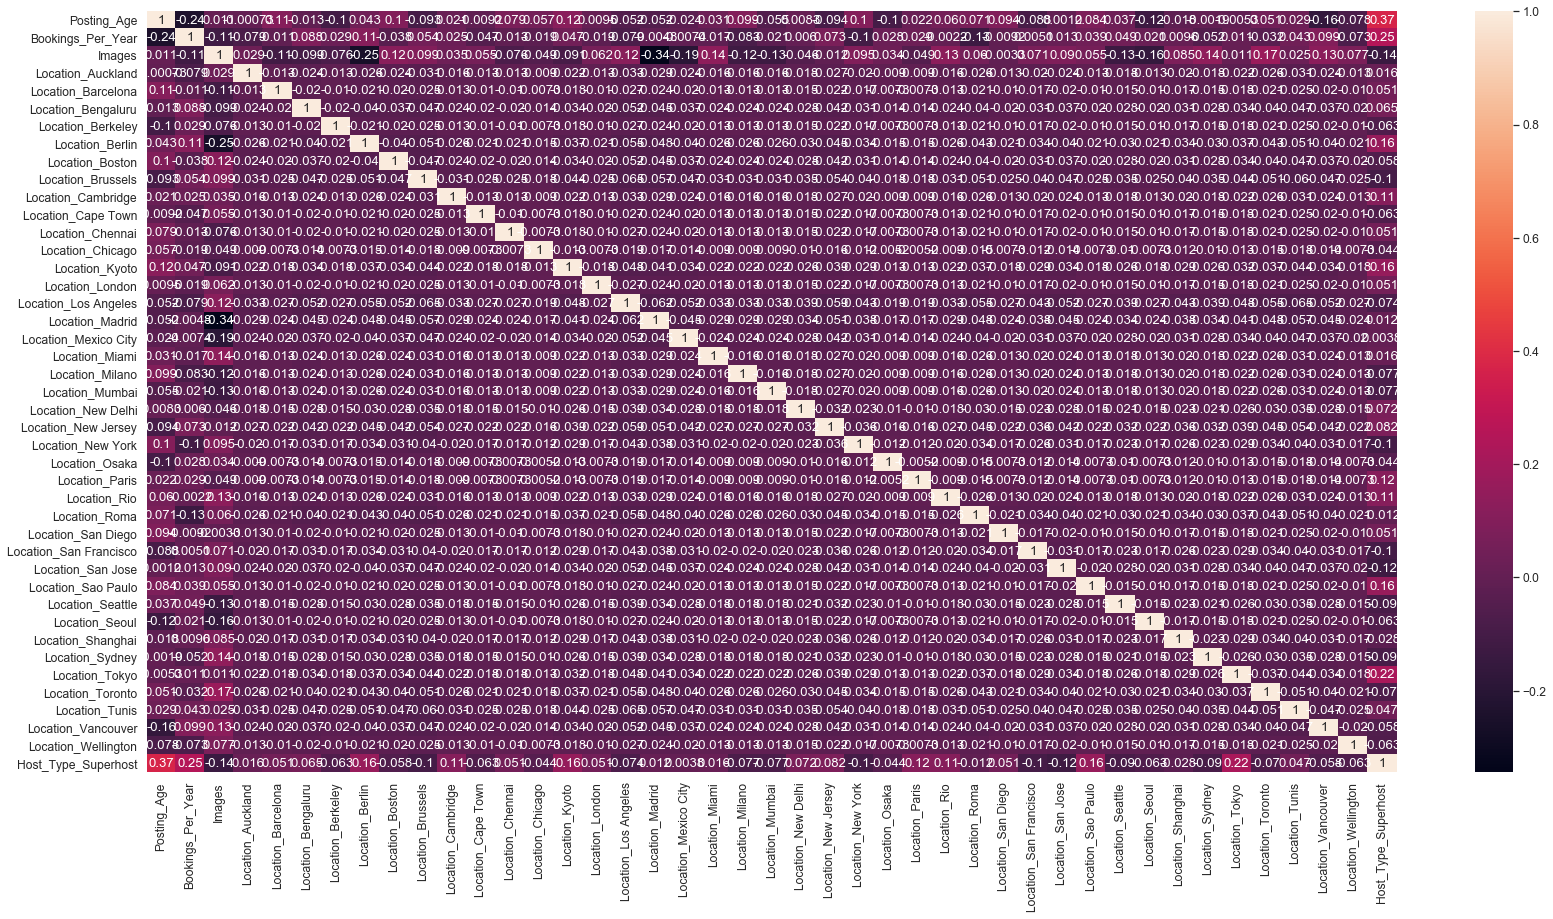

In [322]:
fig, ax = plt.subplots(figsize=(28,14))
sns.heatmap(df_encoded.corr(), annot=True, ax=ax)

In [323]:
train_y = df_encoded['Images']
train_x = df_encoded.drop(labels=['Images'], axis=1)

In [324]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score, precision_score
import time

In [325]:
def print_scores(model, X_train, X_test, y_train, y_test):
    """Print the R-squared and RMSE scores for the train and test set
    
    Parameters
        model: fitted regression model
    """
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
    rmse_test = (mean_squared_error(y_test, y_pred_test))**0.5

    print(
        'Train R-squared: {:.3f}\tTrain RMSE: {:.2f}\
        \nTest R-squared: {:.3f}\tTest RMSE: {:.2f}'
        .format(r2_train, rmse_train, r2_test, rmse_test)
    )

In [331]:
# Model training and validation

def baseline_models(data=[], verbose=False):
    #List of models to be used
    models=[ LinearRegression(),LogisticRegression(), RandomForestRegressor(), XGBRegressor(), LGBMRegressor()]
    #Create training and testing data sets depending on wheather or not they have been generated previously.
    if len(data)== 2:
        X_train, X_test, y_train, y_test = train_test_split(data[0],data[1],random_state=123)
    else:
        X_train, X_test, y_train, y_test = data[0],data[1],data[2],data[3]
    #Instantiate lists to store each of the models results
    accuracy = []
    f1 = []
    auc = []
    recall = []
    precision = []
    results=[]
    #Run thorugh each of the models to get their performance metrics
    for model in models:
        clf = model
        clf.fit(X_train, y_train)
        test_preds = clf.predict(X_test)
        #Print the model and its report
        if verbose:
            print()
            print('Regression Model: ',model,'\n')
            print('mean_absolute_error: ', str(mean_absolute_error(y_test, test_preds)))
            print('mean_squared_error: ', str(mean_squared_error(y_test, test_preds)))
            print('r2_score: ', str(r2_score(y_test, test_preds)))
            print_scores(clf, X_train, X_test, y_train, y_test)
            print("-"*50)

In [332]:
result = baseline_models(data=[train_x, train_y], verbose=True)
result


Regression Model:  LinearRegression() 

mean_absolute_error:  5.247745066502629
mean_squared_error:  41.39236245539046
r2_score:  0.08111374075046707
Train R-squared: 0.546	Train RMSE: 4.66        
Test R-squared: 0.081	Test RMSE: 6.43
--------------------------------------------------

Regression Model:  LogisticRegression() 

mean_absolute_error:  6.204081632653061
mean_squared_error:  63.224489795918366
r2_score:  -0.4035467287991419
Train R-squared: 0.191	Train RMSE: 6.22        
Test R-squared: -0.404	Test RMSE: 7.95
--------------------------------------------------



C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Regression Model:  RandomForestRegressor() 

mean_absolute_error:  5.709387755102041
mean_squared_error:  45.82117959183673
r2_score:  -0.01720341173859974
Train R-squared: 0.881	Train RMSE: 2.39        
Test R-squared: -0.017	Test RMSE: 6.77
--------------------------------------------------

Regression Model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 

mean_absolute_error:  6.0023834072813695
mean_squared_error:  51.149490207033786
r2_score:  -0.135488793844891

#### Cross Validate Hypertuned XGBRegressor 

In [333]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=10,
                verbose=400)

        pred = alg.predict(x_test)
        print_scores(alg, x_train, x_test, y_train, y_test)
        print("-"*50)
    
    return alg

In [334]:
xgb_params= {'n_estimators': 200, 
             'max_depth': 15, 
             'learning_rate': 0.07,
              'min_child_weight':2
            }
xgb_model = cross_val(train_x, train_y, XGBRegressor, xgb_params)

Fold: 0
[0]	validation_0-rmse:19.42372
[51]	validation_0-rmse:7.01137
Train R-squared: 0.845	Train RMSE: 2.76        
Test R-squared: -0.067	Test RMSE: 6.87
--------------------------------------------------
Fold: 1
[0]	validation_0-rmse:19.52924


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)


[47]	validation_0-rmse:6.64407
Train R-squared: 0.807	Train RMSE: 3.09        
Test R-squared: 0.043	Test RMSE: 6.51
--------------------------------------------------
Fold: 2
[0]	validation_0-rmse:19.82256
[55]	validation_0-rmse:5.99755
Train R-squared: 0.880	Train RMSE: 2.41        
Test R-squared: 0.303	Test RMSE: 5.98
--------------------------------------------------
Fold: 3
[0]	validation_0-rmse:19.42390
[44]	validation_0-rmse:6.09534
Train R-squared: 0.751	Train RMSE: 3.47        
Test R-squared: 0.292	Test RMSE: 6.08
--------------------------------------------------
Fold: 4
[0]	validation_0-rmse:19.04643
[38]	validation_0-rmse:6.81904
Train R-squared: 0.627	Train RMSE: 4.25        
Test R-squared: 0.115	Test RMSE: 6.72
--------------------------------------------------
Fold: 5
[0]	validation_0-rmse:18.12665
[36]	validation_0-rmse:6.55753
Train R-squared: 0.522	Train RMSE: 4.81        
Test R-squared: 0.243	Test RMSE: 6.13
--------------------------------------------------
Fold

In [335]:
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y ,random_state=123)
pred = xgb_model.predict(X_test)
print_scores(xgb_model, X_train, X_test, y_train, y_test)
print('r2_score: ', str(r2_score(y_test, pred)))

Train R-squared: 0.833	Train RMSE: 2.83        
Test R-squared: 0.760	Test RMSE: 3.29
r2_score:  0.760436169121325


#### 	Hypertuned XGBRegressor and got R-Squared value to be 0.76, which means that we can account for around 76% of the variance using our features using XGBRegressor 